<a href="https://colab.research.google.com/github/LucaT16/loc4tor/blob/master/Python%20Scripts/loc4tor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loc4tor

### Import TensorFlow

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pickle
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Read Dataset

In [6]:
train_images = pickle.load(open("x.pickle","rb")) 
train_labels = pickle.load(open("y.pickle","rb")) 

train_images = train_images/255.0

train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2)

### Verify the data

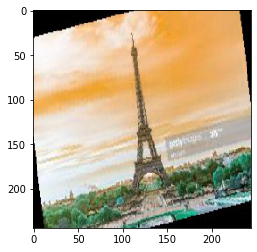

In [7]:
plt.imshow(train_images[0])
plt.show()

### Create the convolutional base

In [8]:
IMG_SIZE = 244

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 242, 242, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 121, 121, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 119, 119, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 207936)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

### Compile and train the model

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Train on 3864 samples, validate on 430 samples
Epoch 1/10
3864/3864 [==============================] - 170s 44ms/sample - loss: 1.8283 - accuracy: 0.2681 - val_loss: 1.3813 - val_accuracy: 0.3977
Epoch 2/10
3864/3864 [==============================] - 169s 44ms/sample - loss: 1.3018 - accuracy: 0.4586 - val_loss: 1.1875 - val_accuracy: 0.5302
Epoch 3/10
3864/3864 [==============================] - 168s 43ms/sample - loss: 0.9752 - accuracy: 0.6322 - val_loss: 0.9724 - val_accuracy: 0.6140
Epoch 4/10
3864/3864 [==============================] - 164s 42ms/sample - loss: 0.5630 - accuracy: 0.8010 - val_loss: 0.9237 - val_accuracy: 0.6791
Epoch 5/10
3864/3864 [==============================] - 164s 42ms/sample - loss: 0.2457 - accuracy: 0.9167 - val_loss: 0.9554 - val_accuracy: 0.7419
Epoch 6/10
3864/3864 [==============================] - 237s 61ms/sample - loss: 0.0990 - accuracy: 0.9708 - val_loss: 1.2425 - val_accuracy: 0.7140
Epoch 7/10
3864/3864 [==============================] - 226

### Evaluate the model

1074/1 - 19s - loss: 1.3490 - accuracy: 0.7356


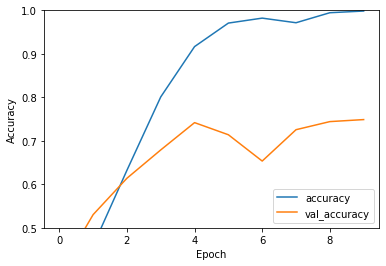

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [11]:
print(test_acc)

0.735568


### Save the model

In [12]:
MODEL_DIR = "models/loc4tor/1"
export_path = os.path.join(MODEL_DIR)
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = models/loc4tor

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/loc4tor/assets


#### Convert model to JSON 

$ tensorflowjs_converter --input_format=tf_saved_model /Users/luca/loc4tor/PythonScripts/models/loc4tor/1 /Users/luca/loc4tor/Frontend/js/model

